<a href="https://colab.research.google.com/github/sightes/BIGDATA-UBO2022/blob/main/BIGDATA_UBO_02_12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount("/content/gdrive")
gdrive='content/gdrive/MyDrive/UBO-BIGDATA1'
     

Mounted at /content/gdrive


In [ ]:
%%capture
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget 'https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz' -O 'spark-3.3.1-bin-hadoop3.tgz'
!tar -xvf /content/spark-3.3.1-bin-hadoop3.tgz
!pip install -q findspark 
     

In [ ]:
import os 
os.environ['JAVA_HOME']='/usr/lib/jvm/java-8-openjdk-amd64'
os.environ['SPARK_HOME']='/content/spark-3.3.1-bin-hadoop3'

In [ ]:
import findspark 
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").appName("ejemplo1").getOrCreate()
# CARGAR SPARK CONTEXT
sc=spark.sparkContext

In [ ]:
data=[1,2,3,4,5]

In [ ]:
RDDbase=sc.parallelize(data)

In [ ]:
#transformacion
newRDD=RDDbase.map(lambda x: x*2)

In [ ]:
#accion
newRDD.collect()

[2, 4, 6, 8, 10]

In [ ]:
#transformacion2 
newRDD2=RDDbase.filter(lambda x:x%2 ==0)

In [ ]:
#accion
newRDD2.filter(lambda x:x==2).collect()

[2]

Page Rank 

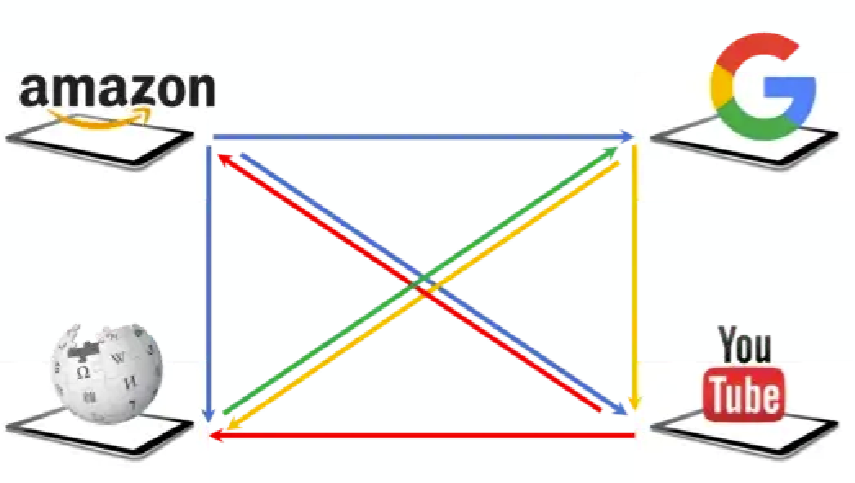

In [ ]:
import findspark 
findspark.init()
from pyspark.sql import SparkSession
spark=SparkSession.builder.master("local[*]").appName("ejemplo1").getOrCreate()
# CARGAR SPARK CONTEXT
sc=spark.sparkContext

In [ ]:
pagelinks= [ ['a',['b','c','d']],
             ['b',['c','d']],
             ['c',['b']],
             ['d',['a','c']]
            ]
pagerank=[['a',1],['b',1],['c',1],['d',1]]

In [ ]:
def rankcontribution(uris,rank):
  numuris=len(uris)
  rankcontribution=float(rank)/numuris
  newrank=[]
  for uri in uris:
    newrank.append((uri,rankcontribution))
  return newrank
pagelinkRDD = sc.parallelize(pagelinks,2)
pagerankRDD = sc.parallelize(pagerank,2)
pagelinkRDD.collect()

[['a', ['b', 'c', 'd']], ['b', ['c', 'd']], ['c', ['b']], ['d', ['a', 'c']]]

In [ ]:
s=0.77
for i in range(20): 
 linksrank=pagelinkRDD.join(pagerankRDD) 
contriRDD=linksrank.flatMap(lambda x: rankcontribution(x[1][0],x[1][1]))
sumrank=contriRDD.reduceByKey(lambda v1,v2: v1+v2)
pagerankRDD=sumrank.map(lambda x: (x[0],(1-s)+s*x[1]))
pagerankRDD.collect()

[('c', 1.2265542046030837),
 ('b', 1.3168915907938326),
 ('d', 0.8857202958867915),
 ('a', 0.5708339087162921)]